# **Econ 441B W23 Lec2**

# **Juntao Li  906092273**

# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df=pd.read_csv("/content/gdrive/MyDrive/Econ 441B 23Winter/insurance.csv")

In [4]:
df.loc[df["sex"] == "female","sex"] = 1
df.loc[df["sex"] == "male","sex"] = 0
df.loc[df["smoker"] == "yes","smoker"] = 1
df.loc[df["smoker"] == "no","smoker"] = 0
df=pd.get_dummies(df,columns=['region'])
charges=df.pop('charges')
df.insert(9,'charges',charges)

In [5]:
df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,27.900,0,1,0,0,0,1,16884.92400
1,18,0,33.770,1,0,0,0,1,0,1725.55230
2,28,0,33.000,3,0,0,0,1,0,4449.46200
3,33,0,22.705,0,0,0,1,0,0,21984.47061
4,32,0,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0,10600.54830
1334,18,1,31.920,0,0,1,0,0,0,2205.98080
1335,18,1,36.850,0,0,0,0,1,0,1629.83350
1336,21,1,25.800,0,0,0,0,0,1,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [6]:
import numpy as np

In [7]:
data=np.array(df.iloc[:,:-1])
target=np.array(df.iloc[:,-1])

In [8]:
cut=int((len(data)*0.8)//1)

In [9]:
in_data=data[:cut]
out_data=data[cut:]

in_target=target[:cut]
out_target=target[cut:]

# 3.) Normalize the Data

In [10]:
from sklearn import preprocessing

In [11]:
scaler=preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [12]:
#LassoCV
from sklearn.linear_model import LassoCV
modCV=LassoCV().fit(in_data_scale,in_target)
a=modCV.alpha_

In [13]:
a

176.27926602952408

# 5.) Run a Lasso regression with that Lambda

In [14]:
from sklearn.linear_model import Lasso
mod=Lasso(alpha=a).fit(in_data_scale,in_target)

In [15]:
mod.coef_

array([3528.02573535,    0.        , 1826.25842562,  357.05552225,
       9280.6004751 ,  184.56649395,    0.        ,   -0.        ,
        -65.22282232])

In [16]:
index=['age','sex','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']

# 6.) Visualize the coefficients 

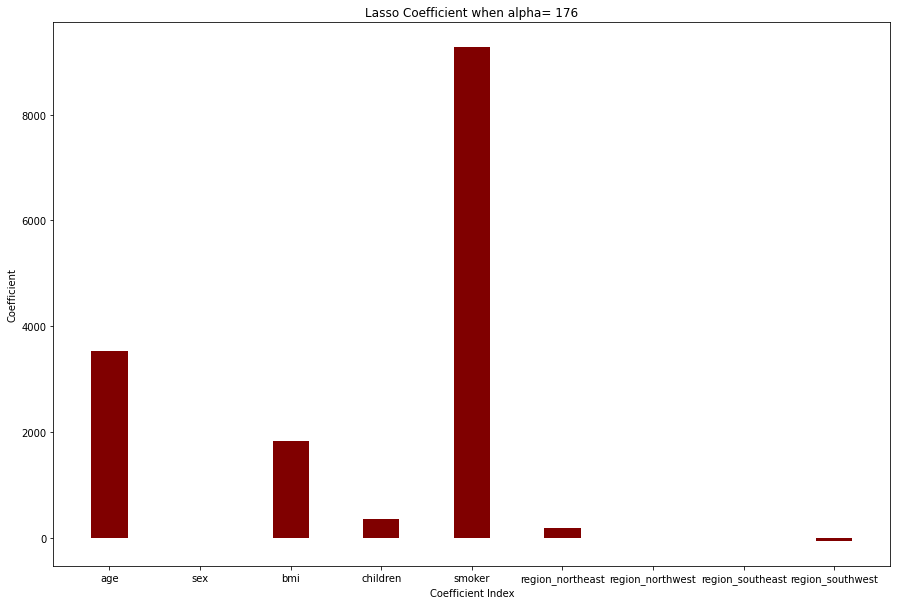

In [17]:
fig = plt.figure(figsize = (15, 10))
plt.bar(index, mod.coef_, color ='maroon',
        width = 0.4)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient')
plt.title('Lasso Coefficient when alpha= 176')
plt.show()

# 7.) Interpret the coefficients

The coeffiecient for variable "age" is 3528, which means the insurance charge is expected to increase by 3528 dollars when age increases by 1. The coeffiecient for variable "sex" is 0, which means the insurance charge is independent to the sex of customer. The coeffiecient for variable "bmi" is 1826, which means the insurance charge is expected to increase by 1826 dollars when bmi increases by 1. The coeffiecient for variable "children" is 357, which means the insurance charge is expected to increase by 357 dollars when children number increases by 1. The coeffiecient for variable "smoker" is 9281, which means the insurance charge is expected to increase by 9281 dollars when the customer is a smoker. The coeffiecient for variable "region_northeast" is 185, which means the insurance charge is expected to increase by 185 dollars when the customer is in northeastern region. The coeffiecients for variable "region_northwest" and "region_southeast" are 0, which means the insurance charge is expected to remain same when the customer is in northwestern and southeastern regions. The coeffiecient for variable "region_southwest" is -65, which means the insurance charge is expected to decrease by 65 dollars when the customer is in southwestern region.

# 8.) Compare in and out of sample MSE’s

In [18]:
m=mod.predict(in_data_scale)
from sklearn.metrics import mean_squared_error
mse_in=mean_squared_error(in_target,m)
mse_in

36603129.01103468

In [19]:
modCV1=LassoCV().fit(out_data_scale,out_target)
a1=modCV.alpha_
mod1=Lasso(alpha=a1).fit(out_data_scale,out_target)
n=mod1.predict(out_data_scale)
mse_out=mean_squared_error(out_target,n)
mse_out

36640657.98955949

Since mse_out is greater than mse_in, out of sample MSE is greater than in sample MSE.